#                                     Proyecto Primer Bimestre

# Tema: Crimenes Reportados en Seattle en 2019

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [142]:
path = "C:\\Users\\Carlos\\Documents\\GitHub\\py-Aguirre-Maldonado-Carlos-Arturo\\trabajoSemestre1\\data\\Crime_Data.csv"
columnas_a_usar = ["Report Number","Occurred Date","Occurred Time","Reported Date","Reported Time","Crime Subcategory","Precinct","Neighborhood"]
df = pd.read_csv(
        path,
        usecols=columnas_a_usar,
        sep=',',
        index_col = "Report Number",
        )

In [145]:
path_guardado = 'C:\\Users\\Carlos\\Documents\\GitHub\\py-Aguirre-Maldonado-Carlos-Arturo\\trabajoSemestre1\\data\\Crime_Data.pickle'
df.to_pickle(path_guardado)
df_pickle_guardado = pd.read_pickle(path_guardado)
#df_pickle_guardado

## Cantidad de crimenes ocurridos por mes

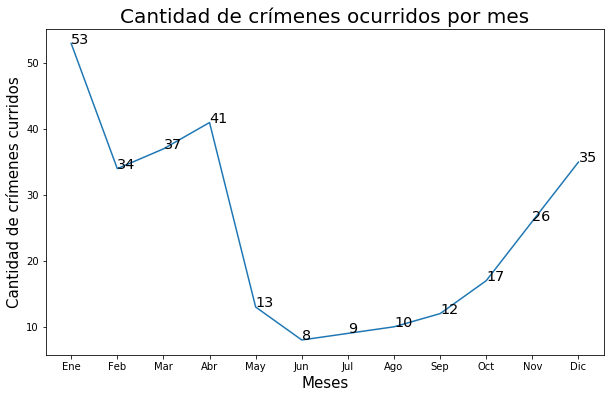

In [146]:
fechas_ocurridos=np.unique(df_pickle_guardado['Occurred Date'].get_values()).astype('<U2')
cantidad_crimenes_por_mes = np.unique(fechas_ocurridos, return_counts = True)[1]
meses = ("Ene","Feb","Mar","Abr","May","Jun","Jul","Ago","Sep","Oct","Nov","Dic")
plt.figure(figsize=(10,6))
plt.title("Cantidad de crímenes ocurridos por mes", fontsize=20)
plt.xlabel("Meses", fontsize=15)
plt.ylabel("Cantidad de crímenes curridos", fontsize=15)
indice = np.arange(len(cantidad_crimenes_por_mes))
plt.xticks(indice, meses)   
plt.yticks(np.arange(0,np.max(cantidad_crimenes_por_mes),10))
plt.plot(cantidad_crimenes_por_mes)
for x,y in zip(indice,cantidad_crimenes_por_mes):
    plt.text(x,y,y,fontsize='x-large')
plt.show()

## Conclusiones
### 1) La canrtidada de crímenes reportados en la ciudad de Seattle se concentra en el mes de enero, seguido por el mes de abril y diciembre, lo que nos indica que las temporadas críticas para actividades de operación de vigilancia y prevención deben concentrarse en las mencionadas temporadas.

### 2) Por otro lado, la menor concentración de crímenes reportados corresponde a los meses junio, julio y agosto; lo que nos indica una temporada de mayor en ese lapso.

### 3) Los valores más representativos se encuentran concentrados en el lapsop de diciembre y enero, además de abril, que son época de invierno y primavera festivos respectivamente, lo que resulta coherente de la inseguirdad con esas actividades.

## Cantidad de reportes por mes

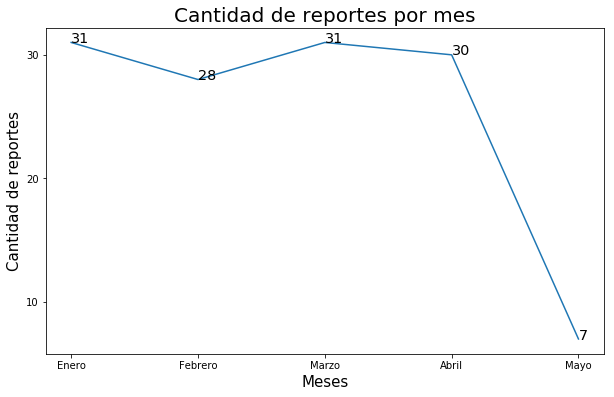

In [147]:
fechas_reportados=np.unique(df_pickle_guardado["Reported Date"].get_values()).astype('<U2')
cantidad_crimenes_reportados_por_mes = np.unique(fechas_reportados, return_counts = True)[1]
meses = ("Enero","Febrero","Marzo","Abril","Mayo")
plt.figure(figsize=(10,6))
plt.title("Cantidad de reportes por mes", fontsize=20)
plt.xlabel("Meses", fontsize=15)
plt.ylabel("Cantidad de reportes", fontsize=15)
indice = np.arange(len(cantidad_crimenes_reportados_por_mes))
plt.xticks(indice, meses)   
plt.yticks(np.arange(0,np.max(cantidad_crimenes_reportados_por_mes),10))
plt.plot(cantidad_crimenes_reportados_por_mes)
for x,y in zip(indice,cantidad_crimenes_reportados_por_mes):
    plt.text(x,y,y,fontsize='x-large')
plt.show()

## Conclusiones
### 1) Dado que los datos obtenidos se registraron hasta inicios del mes de mayo, la cantidad de crimenes reportados en este mes no son representativos para análisis.

### 2) La curva durante los otros meses se muestra estable con un promedio general de 30 crímenes reportados por mes.

## Cantidad de crímenes reportados por tipo de crimen

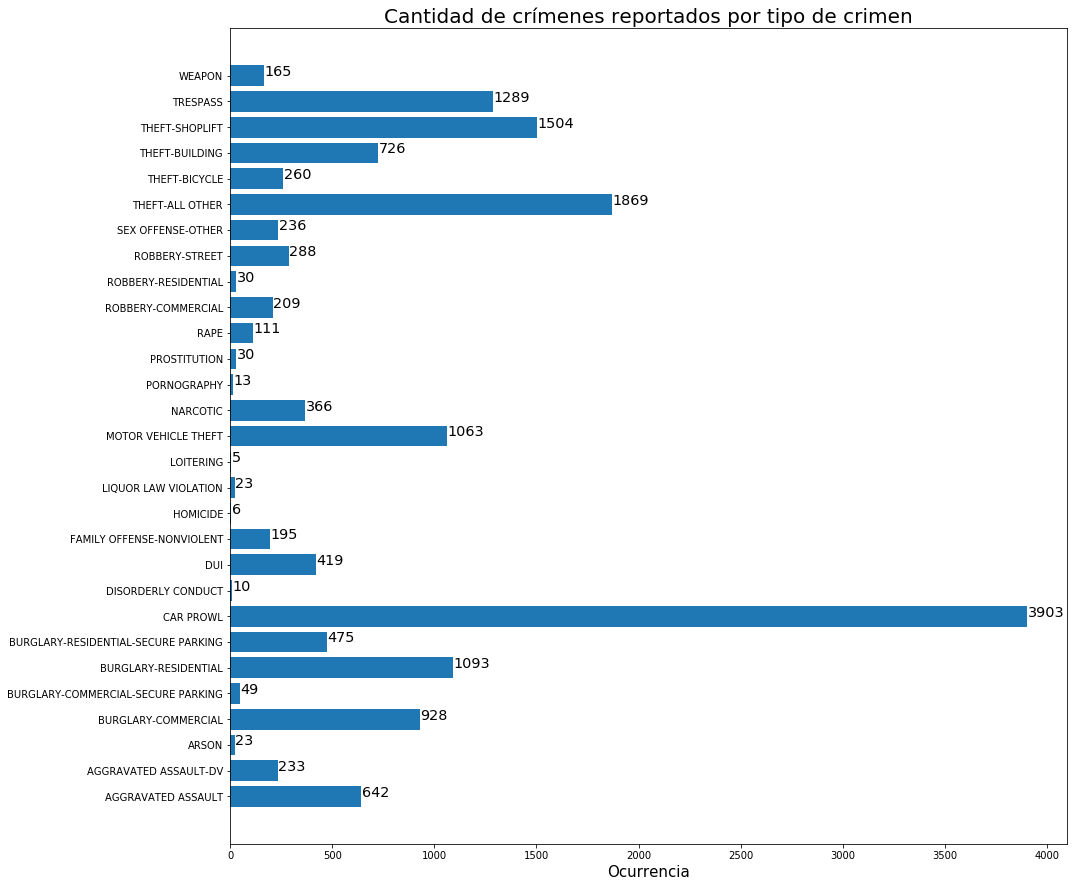

In [148]:
crimenes = np.unique(df_pickle_guardado['Crime Subcategory'].get_values(), return_counts = True)[0]
ocurrencia_crimenes = np.unique(df_pickle_guardado['Crime Subcategory'].get_values(), return_counts = True)[1]
posicion_y = np.arange(len(crimenes))
plt.figure(figsize=(15,15))
plt.barh(posicion_y, ocurrencia_crimenes, align = "center")
plt.yticks(posicion_y, crimenes)
plt.xlabel('Ocurrencia', fontsize=15)
plt.title("Cantidad de crímenes reportados por tipo de crimen", fontsize=20)
for i, v in enumerate(ocurrencia_crimenes):
    plt.text(v + 3, i, str(v),fontsize='x-large')
plt.show()

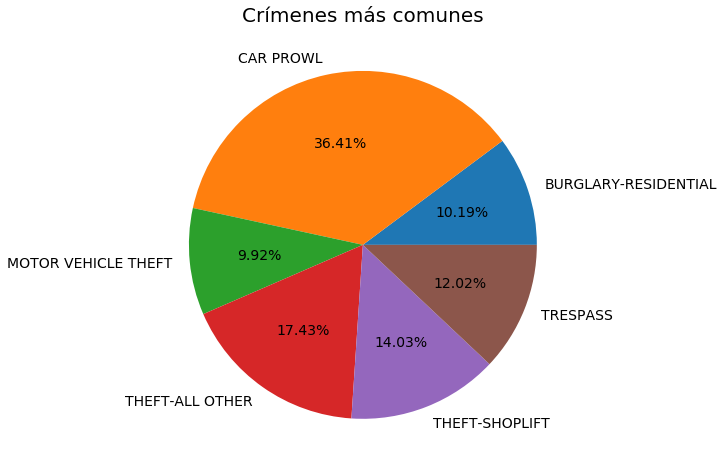

In [149]:
crimenes = np.unique(df_pickle_guardado['Crime Subcategory'].get_values(), return_counts = True)
barrios_peligrosos=crimenes[0][np.where(crimenes[1] >=1000)]
barrios_peligrosos_ocurrencias = crimenes[1][np.where(crimenes[1] >=1000)]

impr = barrios_peligrosos
vol = barrios_peligrosos_ocurrencias
plt.figure(figsize=(8,8))
plt.pie(vol, labels=impr, autopct='%1.2f%%', textprops={'fontsize': 14})
plt.title("Crímenes más comunes", fontsize=20)
plt.show()

## Conclusiones
### 1) Según el gráfico de barras, el tipo de crimen más significativo en la ciudad de Seattle es "CAR PROWL" (robo del contenido de vehículos estacionados), seguido por el "THEFT-ALLOTHER" (robo a transeuntes) y por "SHOPLIFT" (robo a tiendas). Esta información es relevante para el establecimiento de operativos acordes a estas necesidades por parte de los organimos de seguridad.

### 2) La misma información en los casos más relvantes se puede observar en le gráfico de pastel, con el cual se puede observar que en la ciudad de Seattle los crímenes de allanamiento y robo de propiedad privada son también significativos

### 3) No obstante, es necesario expresar que crímenes como la prostitución, el homicidio y la pornografía no son significativos según los reportes en la ciudad de Seattle.

## Cantidad de crimenes ocurridos por precinto

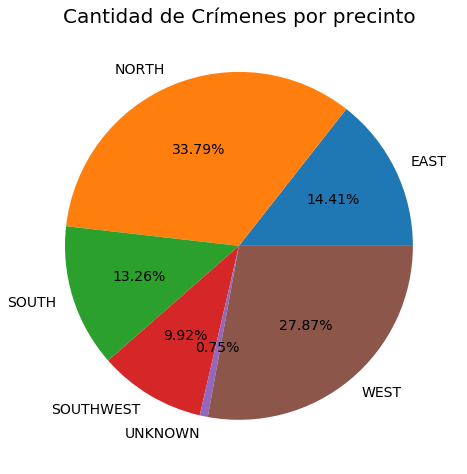

In [150]:
impr = np.unique(df_pickle_guardado['Precinct'].get_values(), return_counts = True)[0]
vol = np.unique(df_pickle_guardado['Precinct'].get_values(), return_counts = True)[1]
plt.figure(figsize=(8,8))
plt.pie(vol, labels=impr, autopct='%1.2f%%', textprops={'fontsize': 14})
plt.title("Cantidad de Crímenes por precinto", fontsize=20)
plt.show()

## Conclusiones
### 1) El gráfico muestra que el precinto (distrito) en el concentran más los crímenes de la ciudad es el norte, seguido por el Oeste, mientras el menor distrito conocido es el sur-oeste. Esta información rsulta interesante para sectorizar la vigilancia y seguridad de la ciudad por parte de los orgnaismos policiales.

### 2) Es importante determinar que los datos de no ubicados son insignificantes, lo que nos indica un adecuado control de la sectorización y ubicación geográfica de los crímenes en la ciudad.

## Crímenes ocurridos según la hora

In [151]:
def arreglo_ocurrencia_horas(df, tipo_tiempo):
    horas_como_entero = df[tipo_tiempo].get_values().astype(int)
    ocurrencias_media_noche = len(df[tipo_tiempo].get_values()[np.where(horas_como_entero<100)])

    ocurrencias_pasada_media_noche = df[tipo_tiempo].get_values()[np.where(horas_como_entero>100)]
    antes_de_10_AM = ocurrencias_pasada_media_noche[np.where(ocurrencias_pasada_media_noche<1000)]
    ocurrencias_antes_de_10_AM=np.unique(antes_de_10_AM.astype("<U1") , return_counts = True)[1]

    pasadas_10_AM = df[tipo_tiempo].get_values()[np.where(horas_como_entero>1000)]
    ocurrecias_pasadas_10_AM=np.unique(pasadas_10_AM.astype("<U2") , return_counts = True)[1]
    
    cantidad_crimenes_por_hora = [ocurrencias_media_noche]
    cantidad_crimenes_por_hora.extend(ocurrencias_antes_de_10_AM)
    cantidad_crimenes_por_hora.extend(ocurrecias_pasadas_10_AM)
    
    return cantidad_crimenes_por_hora

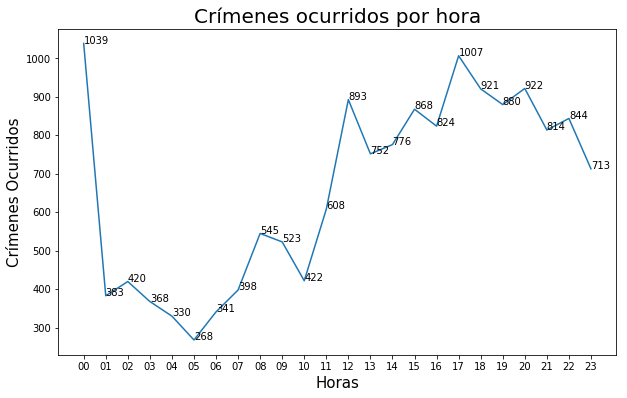

In [152]:
horas = ("00","01","02","03","04","05","06","07","08","09","10","11","12","13","14","15","16","17","18","19","20","21","22","23")
plt.figure(figsize=(10,6))
plt.title("Crímenes ocurridos por hora", fontsize=20)
plt.xlabel("Horas", fontsize=15)
plt.ylabel("Crímenes Ocurridos", fontsize=15)
indice = np.arange(len(arreglo_ocurrencia_horas(df_pickle_guardado,'Occurred Time')))
plt.xticks(indice, horas)   
plt.yticks(np.arange(0,np.max(arreglo_ocurrencia_horas(df_pickle_guardado,'Occurred Time')),100))
plt.plot(arreglo_ocurrencia_horas(df_pickle_guardado,'Occurred Time'))
for x,y in zip(indice,arreglo_ocurrencia_horas(df_pickle_guardado,'Occurred Time')):
    plt.text(x,y,y,fontsize='medium')

## Conclusiones
### 1) Según los reportes, las horas de mayor concentración de crímenes corresponden a la media noche; moestrándose una caída significativa en la madrugada. Sin embargo, es evidente un repunte de la criminalidad hacia las 17 horas y las 12 del día, horarios en los que debería extremarse el control en combinación con las zonas ya determinadas en gráficos anteriores.

### 2) Se comenta que la información obtenida de gráficos anteriores es coherente con las actividades que se desempeñan en la ciudad según su horario: la soledad de la media noche, la ausencia de propietario al medio día y el retorno de actividades laborales son mecanismos que afectan la criminalidad en la ciudad.

## Crímenes reportados según la hora

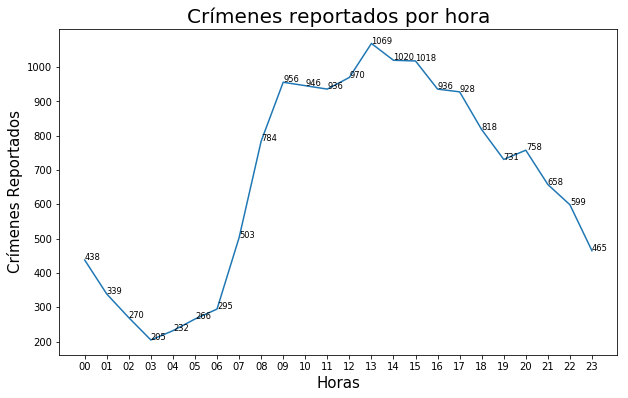

In [153]:
plt.figure(figsize=(10,6))
plt.title("Crímenes reportados por hora", fontsize=20)
plt.xlabel("Horas", fontsize=15)
plt.ylabel("Crímenes Reportados", fontsize=15)
indice = np.arange(len(arreglo_ocurrencia_horas(df_pickle_guardado,'Reported Time')))
plt.xticks(indice, horas)   
plt.yticks(np.arange(0,np.max(arreglo_ocurrencia_horas(df_pickle_guardado,'Reported Time')),100))
plt.plot(arreglo_ocurrencia_horas(df_pickle_guardado,'Reported Time'))
for x,y in zip(indice,arreglo_ocurrencia_horas(df_pickle_guardado,'Reported Time')):
    plt.text(x,y,y,fontsize='small')
plt.show()

## Conclusiones
### 1) Del presente gráfico se puede observar que las horas a las que la víctima reporta el crimen se concentra al medio día, mostrándose esta actividad relevante desde las 8 horas hasta las 17 horas; horario que coincide con las actividades de oficina.

## Crimenes ocurridos por barrio

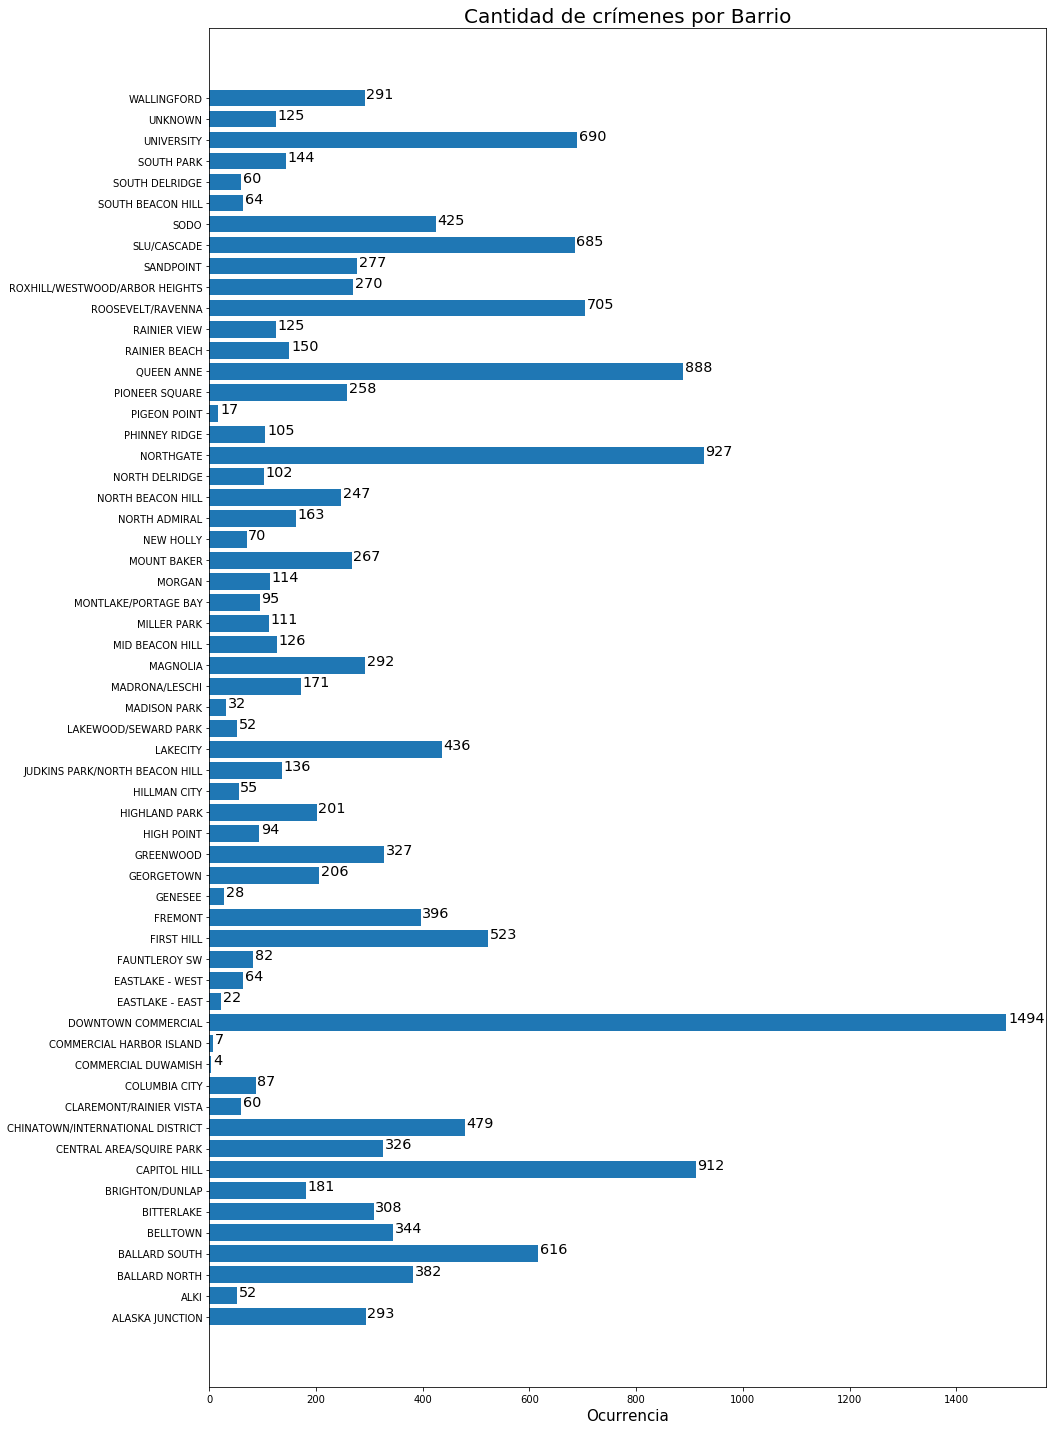

In [154]:
crimenes = np.unique(df_pickle_guardado['Neighborhood'].get_values(), return_counts = True)[0]
ocurrencia_crimenes = np.unique(df_pickle_guardado['Neighborhood'].get_values(), return_counts = True)[1]

posicion_y = np.arange(len(crimenes))
plt.figure(figsize=(15,25))
plt.barh(posicion_y, ocurrencia_crimenes, align = "center")
plt.yticks(posicion_y, crimenes)
plt.xlabel('Ocurrencia', fontsize=15)
plt.title("Cantidad de crímenes por Barrio", fontsize=20)
for i, v in enumerate(ocurrencia_crimenes):
    plt.text(v + 3, i, str(v),fontsize='x-large')
plt.show()

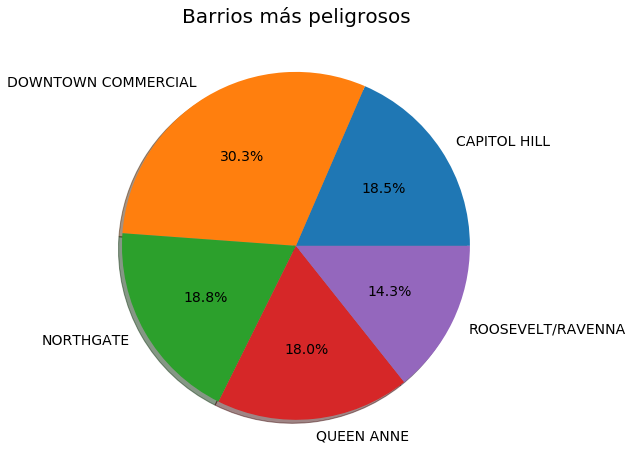

In [155]:
crimenes = np.unique(df_pickle_guardado['Neighborhood'].get_values(), return_counts = True)
barrios_peligrosos=crimenes[0][np.where(crimenes[1] >=700)]
barrios_peligrosos_ocurrencias = crimenes[1][np.where(crimenes[1] >=700)]

impr = barrios_peligrosos
vol = barrios_peligrosos_ocurrencias
plt.figure(figsize=(8,8))
plt.pie(vol, labels=impr, autopct='%1.1f%%', shadow=True, textprops={'fontsize': 14})
plt.title("Barrios más peligrosos", fontsize=20)
plt.show()

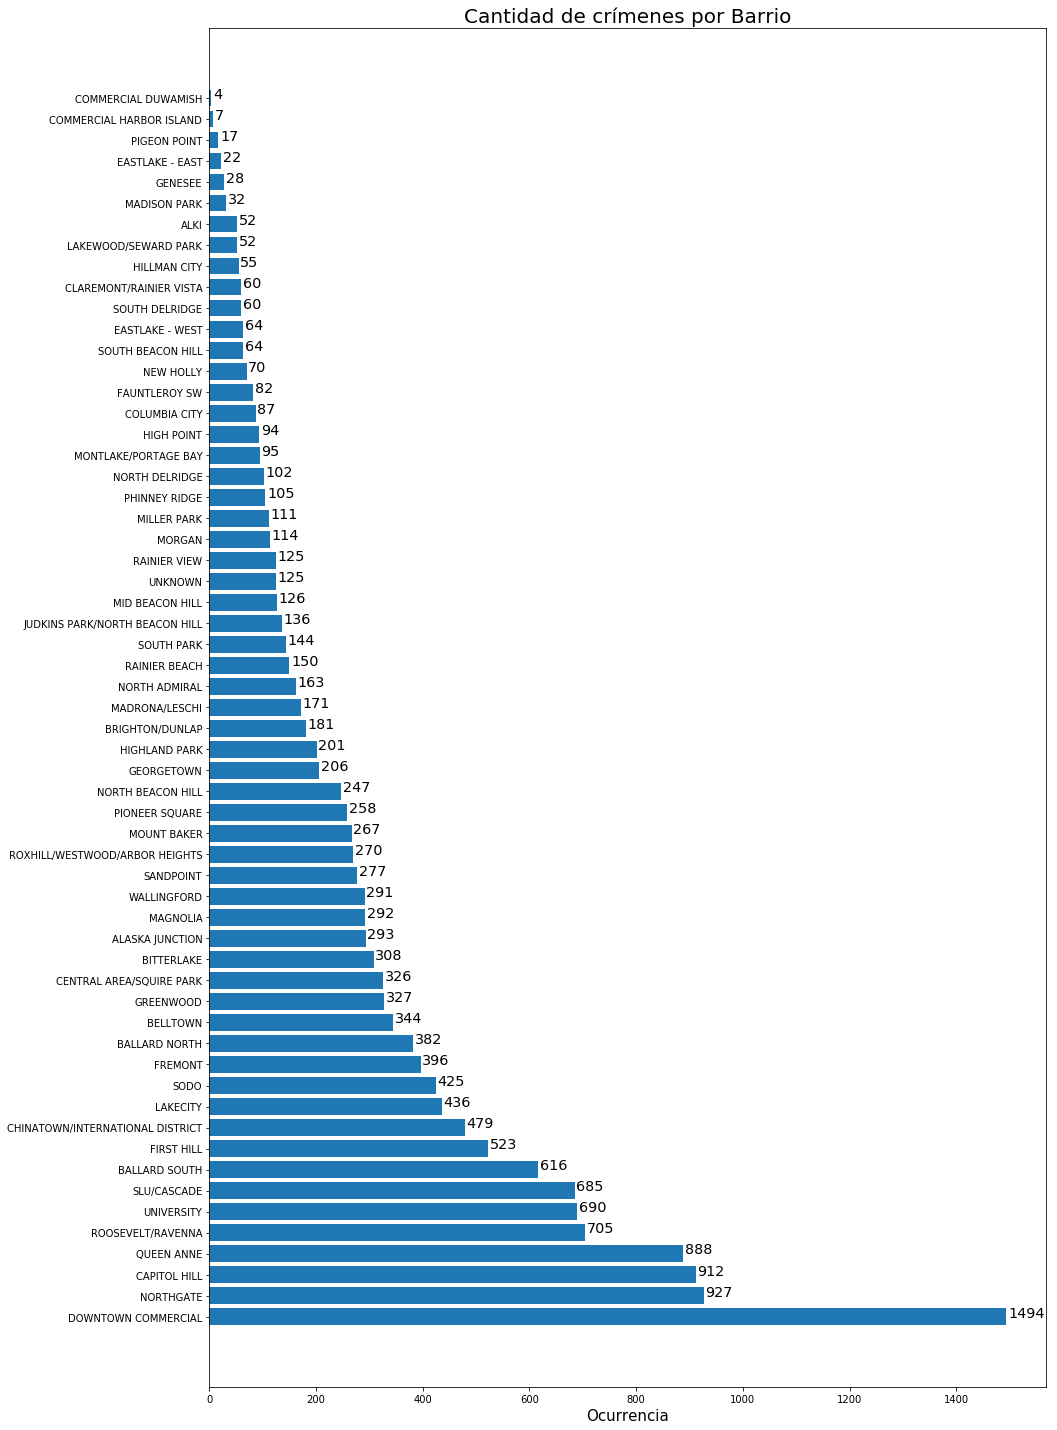

In [156]:
arreglo_barrios = np.unique(df_pickle_guardado['Neighborhood'].get_values(), return_counts = True)
serie_barrios = pd.Series(arreglo_barrios[1],
                          index=arreglo_barrios[0]
                         )
crimenes = serie_barrios.sort_values(ascending=False).index.values.tolist()
ocurrencia_crimenes = serie_barrios.sort_values(ascending=False)
posicion_y = np.arange(len(crimenes))
plt.figure(figsize=(15,25))
plt.barh(posicion_y, ocurrencia_crimenes, align = "center")
plt.yticks(posicion_y, crimenes)
plt.xlabel('Ocurrencia', fontsize=15)
plt.title("Cantidad de crímenes por Barrio", fontsize=20)
for i, v in enumerate(ocurrencia_crimenes):
    plt.text(v + 3, i, str(v),fontsize='x-large')
plt.show()

## Conclusiones
### 1) De los gráficos presedentes se concluye que los cinco barrios más peligrosos de la ciudad son: DOWNTOWN COMMERCIAL, NORTHGATE, CAPITOL HILL, QUEEN ANNE y ROOSEVELT/REVENNA, y los menos peligrosos son: COMMERCIAL DUWAMISH, COMMERCIAL HARBOR ISLAND, PIGEON POINT. Se ha generado un gráfico de concentración de crímenes en donde se demuestra el universo de los mismos, desde los más pequeños hasta el mayor, el mismo que puede servir para determinar el contingente de seguridad en la ciudad.

### 2) También se presenta un gráfico en el que son identificables los barrios en orden alfabético descendente , que facilitaría la ubicación de los mismos para su relación con la criminalidad.

## Cantidad de crímenes ocurridos antes de 2019 por mes 

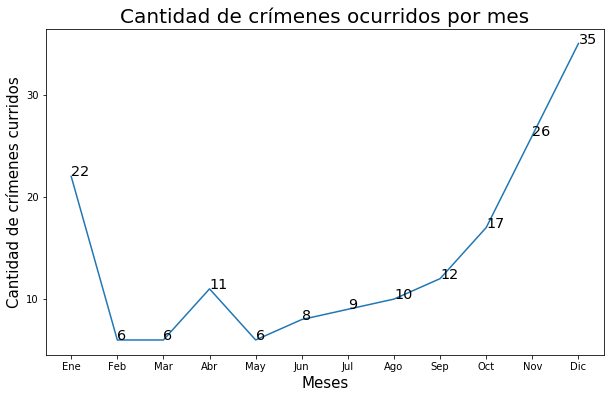

In [157]:
fechas_ocurrencia = np.unique(df_pickle_guardado['Occurred Date'].get_values())
crimenes_ocurridos_en_2019 = []
for crimen in fechas_ocurrencia:
    if crimen.split('/')[2] != '2019':
        crimenes_ocurridos_en_2019.append(crimen)

fechas_ocurridos=np.unique(crimenes_ocurridos_en_2019).astype('<U2')
cantidad_crimenes_por_mes = np.unique(fechas_ocurridos, return_counts = True)[1]
meses = ("Ene","Feb","Mar","Abr","May","Jun","Jul","Ago","Sep","Oct","Nov","Dic")
plt.figure(figsize=(10,6))
plt.title("Cantidad de crímenes ocurridos por mes", fontsize=20)
plt.xlabel("Meses", fontsize=15)
plt.ylabel("Cantidad de crímenes curridos", fontsize=15)
indice = np.arange(len(cantidad_crimenes_por_mes))
plt.xticks(indice, meses)   
plt.yticks(np.arange(0,np.max(cantidad_crimenes_por_mes),10))
plt.plot(cantidad_crimenes_por_mes)
for x,y in zip(indice,cantidad_crimenes_por_mes):
    plt.text(x,y,y,fontsize='x-large')
plt.show()

## Conclusiones
### 1) Se han excluido y presentado por separado los crímenes que corresponden a los años anterioe al presente y su gráfico nos demuestra que los crímenes ocurridos en el mes de diciembre son reportados generalmente en el año siguiente, lo que es necesario considerar, en el análisis de ocurrecia.

## Cantidad de crímenes ocurridos antes de 2019 por hora

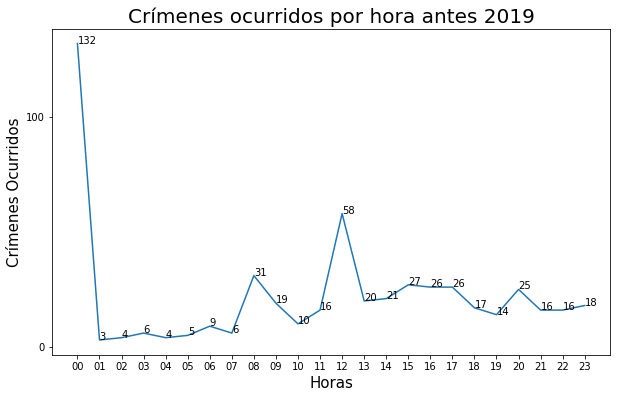

In [175]:
fechas_ocurrencia = df_pickle_guardado['Occurred Date'].get_values()
horas_ocurrencia = df_pickle_guardado['Occurred Time'].get_values()
crimenes_ocurridos_en_2019 = []
aux = 0
for crimen in fechas_ocurrencia:
    if crimen.split('/')[2] != '2019':
        crimenes_ocurridos_en_2019.append(horas_ocurrencia[aux])
    aux +=1
    
horas = ("00","01","02","03","04","05","06","07","08","09","10","11","12","13","14","15","16","17","18","19","20","21","22","23")
plt.figure(figsize=(10,6))
plt.title("Crímenes ocurridos por hora antes 2019", fontsize=20)
plt.xlabel("Horas", fontsize=15)
plt.ylabel("Crímenes Ocurridos", fontsize=15)
indice = np.arange(len(arreglo_ocurrencia_horas(df_ocurrencia_crimenes,'Occurred Time')))
plt.xticks(indice, horas)   
plt.yticks(np.arange(0,np.max(arreglo_ocurrencia_horas(df_ocurrencia_crimenes,'Occurred Time')),100))
plt.plot(arreglo_ocurrencia_horas(df_ocurrencia_crimenes,'Occurred Time'))
for x,y in zip(indice,arreglo_ocurrencia_horas(df_ocurrencia_crimenes,'Occurred Time')):
    plt.text(x,y,y,fontsize='medium')
plt.show()

## Conclusiones
### 1) La cantidad de crímenes ocurridos en años anteriores y reportados en el 2019 confirman las conclusiones de gráficos anteriores respecto de las horas de ocurrencia (media noche y medio día).

## Cantidad de crímenes reportados fuera de año por tipo

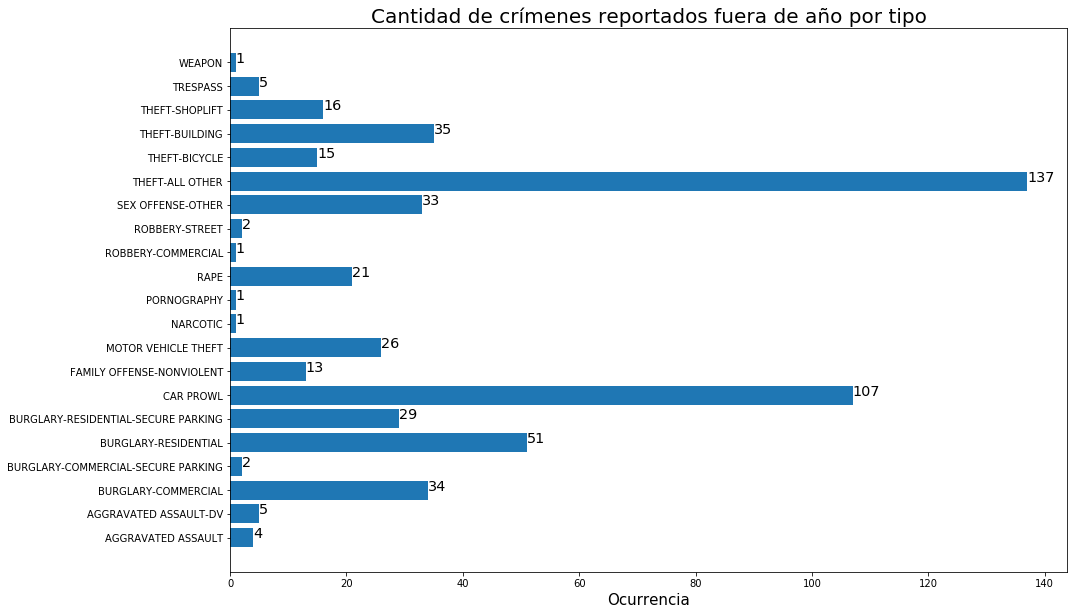

In [159]:
fechas_ocurrencia = df_pickle_guardado['Occurred Date'].get_values()
tipos_crimenes = df_pickle_guardado['Crime Subcategory'].get_values()

tipos_crimenes_ocurridos_antes_2019 = []
aux = 0

for crimen in fechas_ocurrencia:
    if crimen.split('/')[2] != '2019':
        tipos_crimenes_ocurridos_antes_2019.append(tipos_crimenes[aux])
    aux +=1

crimenes = np.unique(tipos_crimenes_ocurridos_antes_2019, return_counts = True)
posicion_y = np.arange(len(crimenes[0]))
plt.figure(figsize=(15,10))
plt.barh(posicion_y, crimenes[1], align = "center")
plt.yticks(posicion_y, crimenes[0])
plt.xlabel('Ocurrencia', fontsize=15)
plt.title("Cantidad de crímenes reportados fuera de año por tipo", fontsize=20)
for i, v in enumerate(crimenes[1]):
    plt.text(v, i, str(v),fontsize='x-large')
plt.show()

## Conclusiones
### 1) Los crímenes reportados con retraso (corresponden a años aneriores y son reportados en 2019) son los relativos a THEFT-ALL OTHER (robo a transeuntes) y CAR PROWL (robo de contenido de vehículos estacionados), lo que demuestra que el procedimiento de reporte debe tener dificultades tramitológicas o decidia de denuncia por parte de las víctimas, situación que debería solucionarse en el aspecto adminitrativo del reporte.